# Projet Riskfolio
Matthieu Hanania

Ce projet a pour but de tester la bibliothèque Riskfolio sur Python.
En se basant sur plusieurs actions boursières, elle définit une stratégie optimale.

In [1]:
# Déblocage des autorisations ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Téléchargement des données

In [ ]:
# Importation des bibliothéques 
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

start="2022-01-01"

assets = ["BNP.PA","ACA.PA","AC.PA","ORA.PA","AI.PA"] # BNP, Crédit Agricole, Accor, Orange , Air liquid
data = yf.download(assets,start=start)

[*********************100%***********************]  5 of 5 completed


In [3]:
# affichage de toutes les valeurs des actions
data.head()

Price           Close                                                   High  \
Ticker          AC.PA     ACA.PA       AI.PA     BNP.PA    ORA.PA      AC.PA   
Date                                                                           
2022-01-03  27.799088   9.838484  121.023186  49.939323  7.713046  27.988971   
2022-01-04  28.900417  10.071741  123.357491  51.612129  7.767063  29.204232   
2022-01-05  28.928898  10.172149  125.362793  51.677410  7.734324  29.194737   
2022-01-06  28.985867  10.289550  122.981483  52.379173  7.719593  29.384624   
2022-01-07  29.061819  10.393047  122.542831  52.632130  7.717138  29.280186   

Price                                                   ...       Open  \
Ticker         ACA.PA       AI.PA     BNP.PA    ORA.PA  ...      AC.PA   
Date                                                    ...              
2022-01-03   9.894095  122.448827  50.175965  7.771155  ...  27.049043   
2022-01-04  10.152068  123.451497  52.011972  7.807985  ...  28.226327   
2022-01-05  10.297273  125.362793  52.444448  7.791616  ...  28.871933   
2022-01-06  10.297274  125.018132  52.493413  7.744965  ...  28.482672   
2022-01-07  10.440934  123.623807  52.648447  7.740054  ...  29.223221   

Price                                                    Volume           \
Ticker         ACA.PA       AI.PA     BNP.PA    ORA.PA    AC.PA   ACA.PA   
Date                                                                       
2022-01-03   9.747344  120.788191  49.865883  7.719593   524091  4846202   
2022-01-04   9.894096  121.665514  50.331006  7.743328  1422637  6062208   
2022-01-05  10.098001  123.169486  51.824288  7.782612   653053  6300320   
2022-01-06  10.111904  124.078137  51.391808  7.734324   809845  7442277   
2022-01-07  10.303452  122.370495  52.224129  7.721230   506225  8210181   

Price                                  
Ticker       AI.PA   BNP.PA    ORA.PA  
Date                                   
2022-01-03  580193  2177649   6450743  
2022-01-04  905098  3614427   8585931  
2022-01-05  973648  3910434   9980707  
2022-01-06  946683  3645405  10120682  
2022-01-07  841561  3446590   6559974  

[5 rows x 25 columns]

In [ ]:
# Affichage de toutes les valeurs des actions

# On s'intéresse uniquement à la valeur finale par jour
# et on calcule les rendements (actuel - précédent) / précédent

returns = data["Close"].pct_change().dropna()
returns

Ticker,AC.PA,ACA.PA,AI.PA,BNP.PA,ORA.PA
Date,,,,,
2022-01-04,0.039617,0.023709,0.019288,0.033497,0.007003
2022-01-05,0.000985,0.009969,0.016256,0.001265,-0.004215
2022-01-06,0.001969,0.011541,-0.018995,0.013580,-0.001905
2022-01-07,0.002620,0.010059,-0.003567,0.004829,-0.000318
2022-01-10,0.004900,0.005351,-0.002301,-0.007752,0.021211
...,...,...,...,...,...
2025-01-07,-0.001932,0.001871,0.006828,0.006164,-0.000208
2025-01-08,0.004302,-0.001868,-0.010172,-0.004305,-0.001040
2025-01-09,0.011352,0.005614,0.004440,-0.003159,0.004164


### Variables

In [6]:
  ## fonction assets_stats

# Méthode utilisée pour calculer la moyenne servant à estimer les retours sur investissement.
method_mu  = "hist" # hist pour utiliser l'estimation basée sur l'évolution temporelle

# Méthode utilisée pour calculer la matrice de covariance
method_cov  = "hist" # hist pour utiliser l'estimation basée sur l'évolution temporelle


 ## Optimization function

# Choix du modèle d'optimisation du portefeuille : 'Classic', 'BL', 'FM' ou 'BLFM'.
model ="Classic" #  utilise la moyenne des retours, et la matrice de covariance en fonction des valeurs historiques

# Mesure de risque utilisée : par défaut, l'écart-type (Standard Deviation).
risk_measure = "MV"

# Fonction objectif : 'MinRisk', 'Utility', 'Sharpe' ou 'MaxRet'.
# Plus de détails disponibles ici : https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html

obj='Sharpe' # rapport des retours calculés / écart-type de l'investissement.

# rf : taux sans risque (Risk-Free Rate). Rendement attendu d'un investissement sans risque. 0 signifie qu'il n'est pas pris en compte.
# l : sensibilité au risque (Risk aversion factor).  0 signifie une neutralité vis-à-vis du risque.
rf=0 
l=0
hist=True

"""
’MV’: Standard Deviation.              ’KT’: Square Root of Kurtosis.         ’MAD’: Mean Absolute Deviation.                    ’GMD’: Gini Mean Difference.    -    
’MSV’: Semi Standard Deviation.        ’SKT’: Square Root of Semi Kurtosis.   ’FLPM’: First Lower Partial Moment (Omega Ratio).  ’SLPM’: Second Lower Partial Moment (Sortino Ratio).    
’CVaR’: Conditional Value at Risk.     ’TG’: Tail Gini.                       ’EVaR’: Entropic Value at Risk.                    ’RLVaR’: Relativistic Value at Risk.    -    
’WR’: Worst Realization (Minimax).     ’RG’: Range of returns.                ’CVRG’: CVaR range of returns.                     ’TGRG’: Tail Gini range of returns.    -    
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).    ’ADD’: Average Drawdown of uncompounded cumulative returns.    
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.         ’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.      ’UCI’: Ulcer Index of uncompounded cumulative returns.
"""


'\n’MV’: Standard Deviation.              ’KT’: Square Root of Kurtosis.         ’MAD’: Mean Absolute Deviation.                    ’GMD’: Gini Mean Difference.    -    \n’MSV’: Semi Standard Deviation.        ’SKT’: Square Root of Semi Kurtosis.   ’FLPM’: First Lower Partial Moment (Omega Ratio).  ’SLPM’: Second Lower Partial Moment (Sortino Ratio).    \n’CVaR’: Conditional Value at Risk.     ’TG’: Tail Gini.                       ’EVaR’: Entropic Value at Risk.                    ’RLVaR’: Relativistic Value at Risk.    -    \n’WR’: Worst Realization (Minimax).     ’RG’: Range of returns.                ’CVRG’: CVaR range of returns.                     ’TGRG’: Tail Gini range of returns.    -    \n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).    ’ADD’: Average Drawdown of uncompounded cumulative returns.    \n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.         ’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative retu

## Optimisation

In [7]:
# Création du portefeuille
port = rp.Portfolio(returns=returns)

# Calcul des entrées utilisées pour l'optimisation du portefeuille
port.assets_stats(method_mu,method_cov)

# Calcul des poids du portefeuille optimal
weight = port.optimization(model=model,rm=risk_measure,obj=obj,rf=rf,l=l,hist=hist)

## Plotting

Les résultats affichés représentent quel est le portefeuil optimal à avoir


             weights
AC.PA   2.929466e-01
ACA.PA  3.911140e-02
AI.PA   1.477818e-01
BNP.PA  1.062009e-10
ORA.PA  5.201602e-01


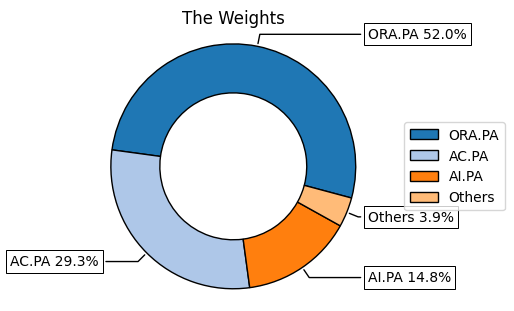

In [8]:
print(weight)
ax = rp.plot_pie(w = weight,title="The Weights",height=3,width =5)

# Dans cet exemple, en se basant sur l'évolution des valeurs boursières des entreprises, 
# il est conseillé d'investir 52 % de son portefeuille dans Orange, 29 % dans Air Liquide, etc.


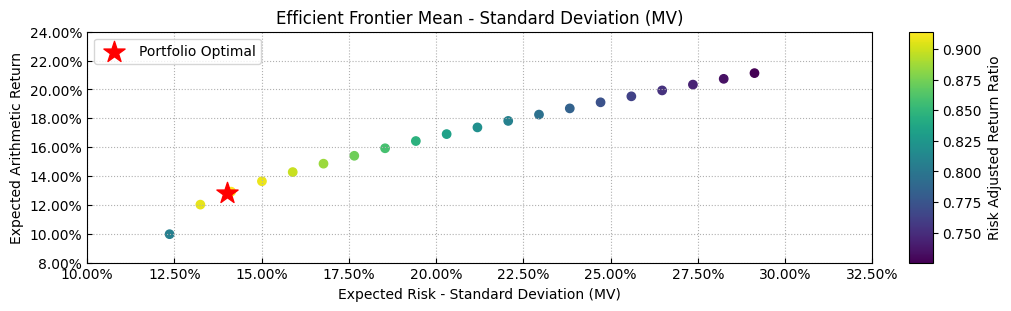

In [10]:
# La carte frontière représente différentes stratégies, chacune ayant un taux de risques et un retour sur investissement différent.
frontier = port.efficient_frontier(model = model,rm=risk_measure,rf = rf,hist=hist, points=20)
ax = rp.plot_frontier(w_frontier=frontier,returns=returns,mu=port.mu,cov=port.cov,rm=risk_measure,rf = rf, cmap='viridis',w=weight,height=3,width =10,label="Portfolio Optimal")

# l'étoile représente le portefeuille optimal, qui optimise le rapport des retours / le risque

In [12]:
# La composition du portefeuille pour chaque point de la courbe. 
frontier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AC.PA,3.731303e-02,2.212108e-01,3.018320e-01,3.665948e-01,4.236166e-01,4.759147e-01,5.249888e-01,5.717485e-01,6.156054e-01,6.548821e-01,6.927422e-01,7.294750e-01,7.652904e-01,8.003457e-01,8.347617e-01,8.686334e-01,9.020367e-01,9.350332e-01,9.676736e-01,1.000000e+00
ACA.PA,7.129287e-02,4.810437e-02,3.792197e-02,2.984986e-02,2.266091e-02,1.604770e-02,9.889207e-03,3.994936e-03,6.296926e-08,1.599927e-07,1.927606e-07,1.124681e-07,6.818896e-08,9.684079e-08,3.570367e-08,1.041389e-07,5.095827e-08,4.532738e-08,5.826446e-09,8.726238e-10
AI.PA,2.688046e-01,1.817584e-01,1.435795e-01,1.129063e-01,8.591918e-02,6.116704e-02,3.792452e-02,1.579741e-02,2.238064e-08,9.402266e-08,1.087705e-07,6.485607e-08,3.855363e-08,5.158035e-08,1.986405e-08,5.277752e-08,2.092977e-08,2.281217e-08,1.953923e-08,5.872123e-10
BNP.PA,1.475236e-09,2.188479e-09,9.262619e-09,9.541489e-10,3.415737e-09,6.473753e-09,1.031431e-08,2.334897e-09,4.368002e-10,6.531068e-09,1.213582e-08,9.443248e-09,6.469918e-09,9.804892e-09,4.360526e-09,1.224839e-08,7.830919e-09,6.280619e-09,3.784307e-09,5.779185e-10
ORA.PA,6.225895e-01,5.489265e-01,5.166665e-01,4.906491e-01,4.678033e-01,4.468706e-01,4.271974e-01,4.084591e-01,3.843945e-01,3.451176e-01,3.072575e-01,2.705248e-01,2.347095e-01,1.996541e-01,1.652382e-01,1.313664e-01,9.796322e-02,6.496676e-02,3.232641e-02,5.198658e-10


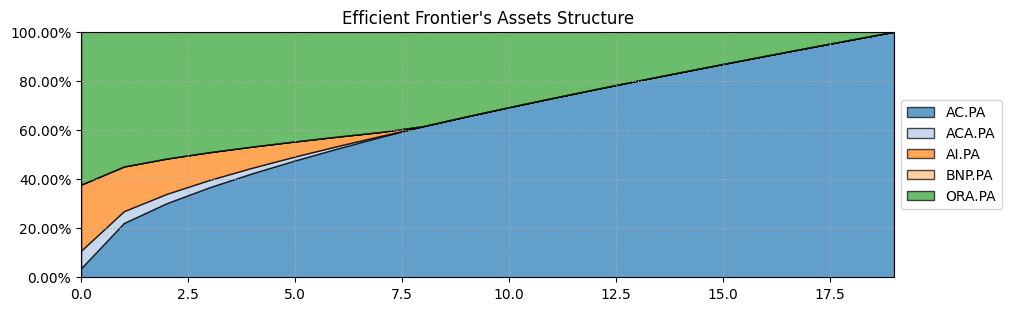

In [13]:
#Représentation de la part de chaque entreprises dans le portefeuille optimal en fonction des points du graph du dessus. 
# les abscisses représentent chaque point, les ordonnées la part de chaque actions.

# au plus on est prêt à prendre des risques, au plus il faut investir dans ACCOR (AC)

ax = rp.plot_frontier_area(frontier,height=3,width =10)

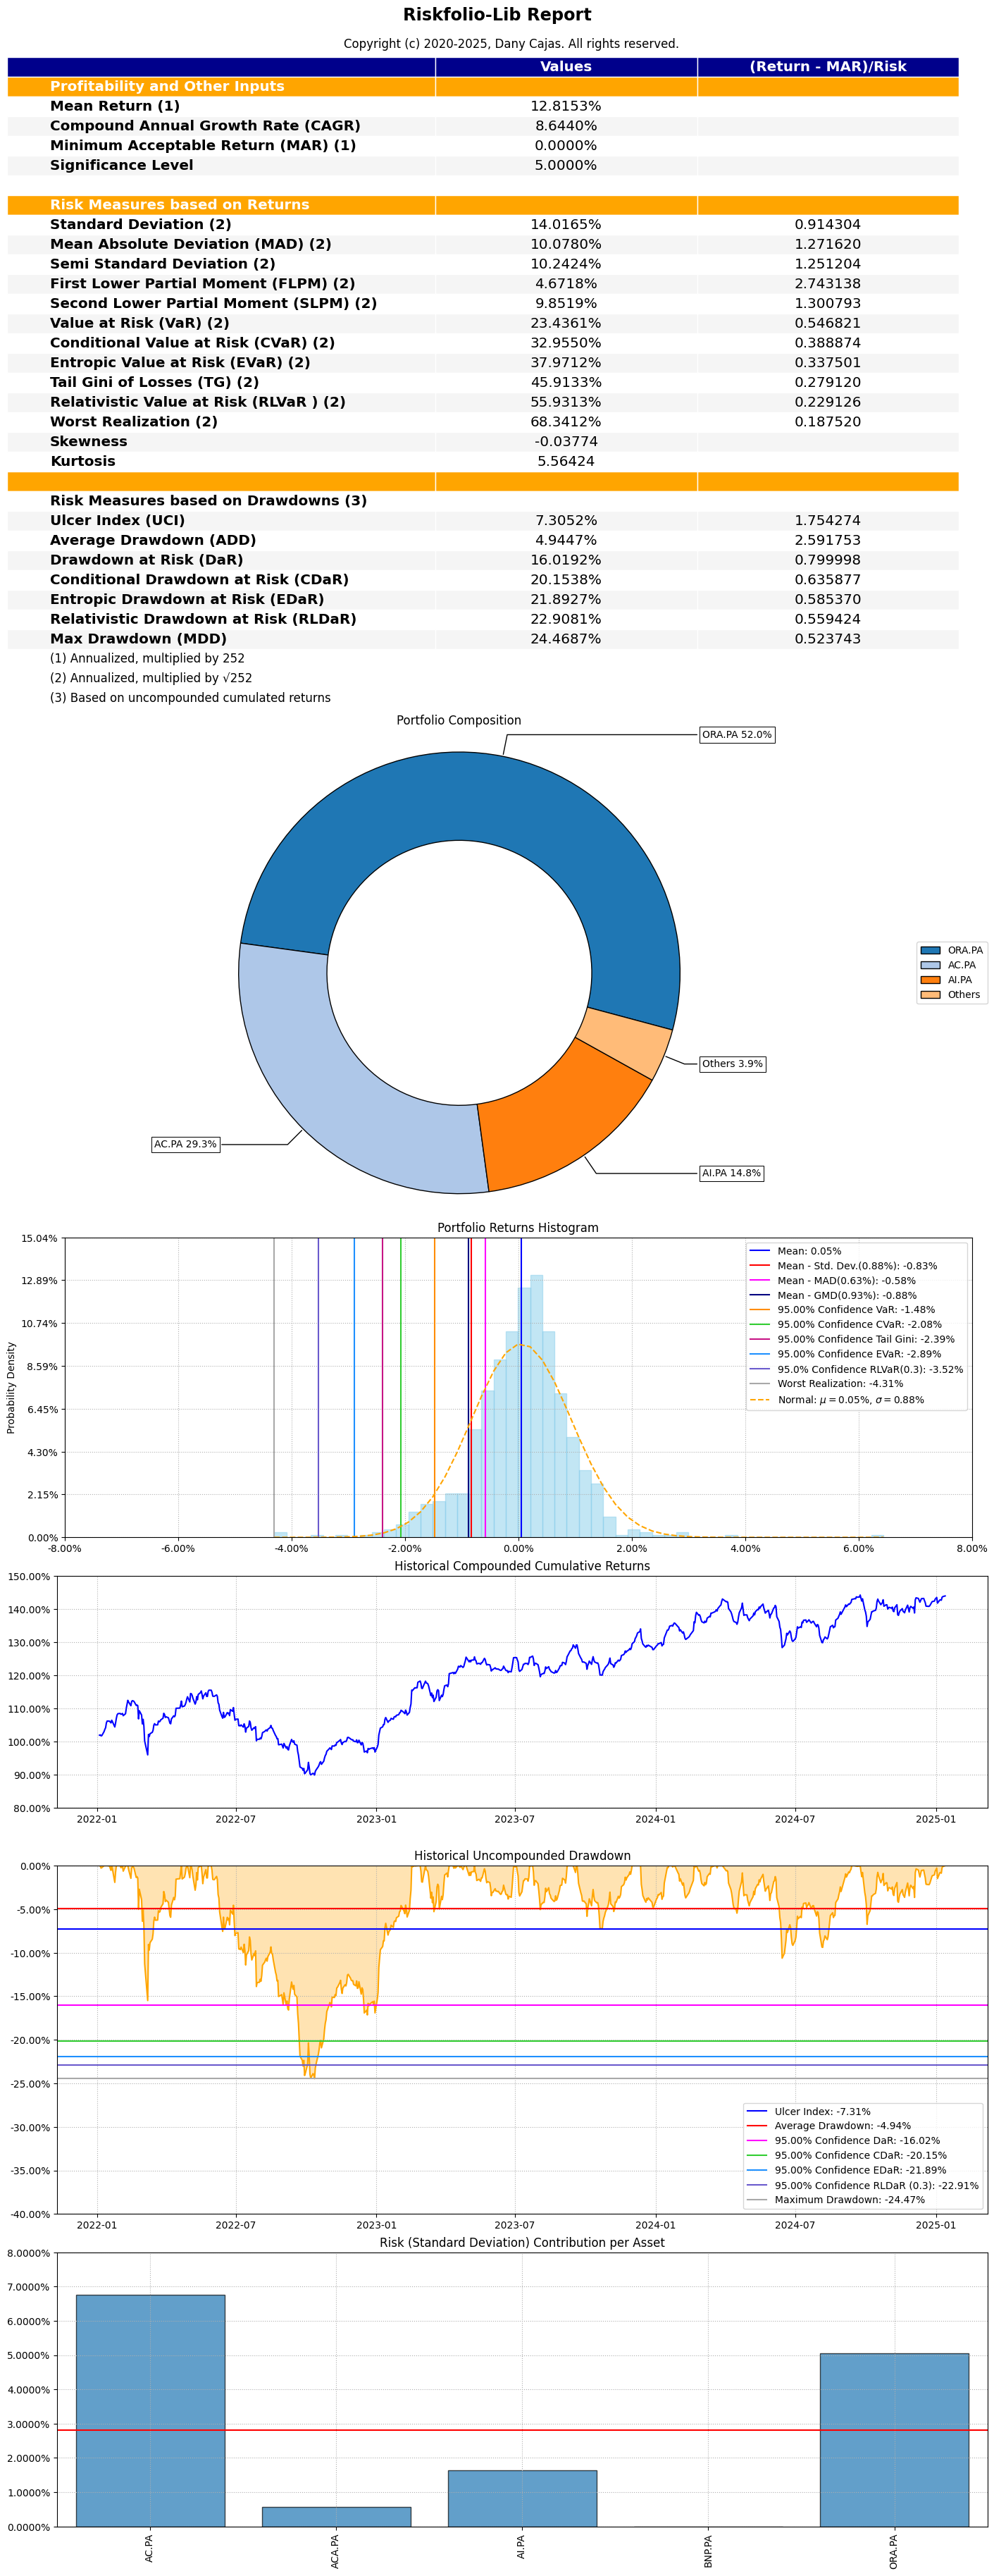

In [14]:
# génére le rapport final
ax = rp.jupyter_report(returns,weight,rm=risk_measure)